In [1]:
# Name: Law Enforecement Situational Threat Recognition
# Purpose: Intro to Machine Learning Final Project 
# Authors: Tim Johnson and Trevor Goad
# Date Created: November 28, 2021

In [2]:
# Import basic libraries
import numpy as np 
import matplotlib.pyplot as plot 
import pandas as pd 

In [3]:
# Read the csv file that has the dataset
dataset = pd.read_csv('SL City Data with 2 classes.csv');
dataset.head()

,day of the week,x coordinate,y coordinate,weapon used,result
0,TUESDAY,1885371,888361,Other,ASSAULTED
1,MONDAY,1889872,883640,Personal Weapons,SAFE
2,SATURDAY,1893431,871953,Personal Weapons,ASSAULTED
3,WEDNESDAY,1887938,885881,Personal Weapons,SAFE
4,SATURDAY,1892618,881991,Motor Vehicle,ASSAULTED


In [4]:
dataset.shape

(3711, 5)

In [5]:
# Defining the day of the week map function
def dayofweek_map(x):
    
    return x.map({'SUNDAY': 1, "MONDAY": 2, "TUESDAY": 3, "WEDNESDAY": 4, "THURSDAY": 5, "FRIDAY": 6, "SATURDAY": 7})

# Defining the type of call map function
def weapon_map(x):
    
    return x.map({'Personal Weapons': 0,'Firearm': 1, "Knife": 2, "Motor Vehicle": 3, "Blunt Object": 4, "None": 5, "Other": 6})

# Defining the map function
def binary_map(x):
    
    return x.map({'ASSAULTED': 1, "SAFE": 0})

In [6]:
# Map day of week input
dayofweek_vars = ['day of the week']

dataset[dayofweek_vars] = dataset[dayofweek_vars].apply(dayofweek_map)

# Map weapon used by offender input
weapon_vars = ['weapon used']

dataset[weapon_vars] = dataset[weapon_vars].apply(weapon_map)

# Map result output
bin_vars = ['result']

dataset[bin_vars] = dataset[bin_vars].apply(binary_map)

dataset.head()

,day of the week,x coordinate,y coordinate,weapon used,result
0,3,1885371,888361,6,1
1,2,1889872,883640,0,0
2,7,1893431,871953,0,1
3,4,1887938,885881,0,0
4,7,1892618,881991,3,1


In [7]:
# Split dataset into independent and dependent variables
x = dataset.iloc[:, [0,1,2,3]].values
y = dataset.iloc[:, 4].values

In [8]:
# Split dataset into training and test sets
from sklearn.model_selection import train_test_split
#np.random.seed(0)
#x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 5)

In [9]:
# Feature scale and standardize data
from sklearn.preprocessing import MinMaxScaler, StandardScaler 

#scaler = StandardScaler()
#x_train = scaler.fit_transform(x_train)
#x_test = scaler.transform(x_test)

In [10]:
# Logistic regression on training set
#from sklearn.linear_model import LogisticRegression
#classifier = LogisticRegression(random_state = 0);
#classifier.fit(x_train, y_train)
#y_pred = classifier.predict(x_test)

# Output first 9 predictions
#y_pred[0:9]

# Naive Bayes Classification
#from sklearn.naive_bayes import GaussianNB
#classifier = GaussianNB()
#classifier.fit(x_train, y_train)
#y_pred = classifier.predict(x_test)

# Output first 9 predictions
#y_pred[0:9]

In [11]:
# Standardizing the features
#x = StandardScaler().fit_transform(x)

In [12]:
# Perform PCA analysis
from sklearn.decomposition import PCA 
pca = PCA(0.95) 
pca.fit(x)
principalDf = pca.transform(x)
pca.n_components_

1

In [13]:
# Split into 80% training and 20% evaluation
x_train, x_test, y_train, y_test = train_test_split(principalDf, y, train_size = 0.90, test_size = 0.10, random_state = 5)
# Scale data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Logistic regression on training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(class_weight = 'balanced');
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [14]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 27, 194],
       [ 18, 133]], dtype=int64)

In [15]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.43010752688172044
Precision: 0.40672782874617736
Recall: 0.8807947019867549


Text(0.5, 257.44, 'Predicted label')

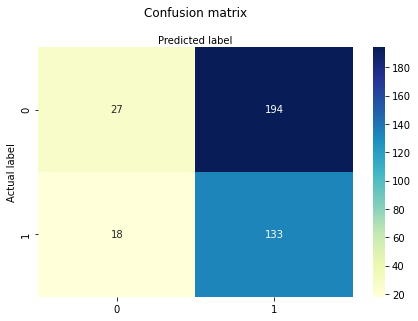

In [16]:
import seaborn as sns
class_names = [0,1] # name of classes
fig, ax = plot.subplots()
tick_marks = np.arange(len(class_names))
plot.xticks(tick_marks, class_names)
plot.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plot.tight_layout()
plot.title('Confusion matrix', y=1.1)
plot.ylabel('Actual label')
plot.xlabel('Predicted label')